<a href="https://colab.research.google.com/github/Vikas-KM/tensorflow-learning/blob/master/Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn

from tensorflow import feature_column
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [29]:
number_of_features = 13
number_of_units = 1  # indicates number of neurons

In [30]:
weight = tf.Variable(tf.zeros([number_of_features, number_of_units]))
bias = tf.Variable(tf.zeros([number_of_units]))

In [42]:
def perceptron(x):
  val = tf.matmul(x, weight)
  val = tf.add(val, bias)
  op = tf.sigmoid(val)
  return op

In [32]:
optimizer = tf.optimizers.Adam(learning_rate= 0.01)
individual_loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x))))

In [33]:
! ls

heart.csv  sample_data


### Heart Disease Dataset
- https://www.kaggle.com/ronitf/heart-disease-uci

In [34]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
df[df['target'] == 0].value_counts().sum()

138

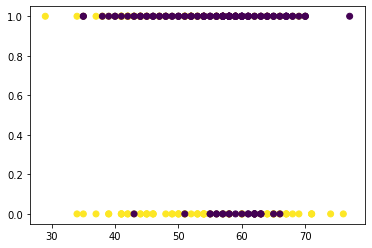

In [35]:
plt.scatter(df.age, df.sex, c=df.target)

In [36]:
x_input = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].to_numpy()
y_input = df[['target']].to_numpy()

In [37]:
x_input.shape

(303, 13)

In [38]:
y_input.shape

(303, 1)

In [39]:
x = tf.Variable(x_input, dtype=tf.float32)
x.shape

TensorShape([303, 13])

In [40]:
y = tf.Variable(y_input, dtype=tf.float32)
y.shape

TensorShape([303, 1])

In [43]:
for i in range(1000):
  optimizer.minimize(individual_loss,[weight, bias])

In [44]:
tf.print(weight, bias)

[[-0.0598578081]
 [-0.060335312]
 [0.0614133663]
 ...
 [-0.0181407351]
 [-0.0604958273]
 [-0.0600617714]] [-0.0596268289]


In [45]:
final_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x)))
tf.print(final_loss)

0.693147361


In [58]:
y_pred = perceptron(x)
y_pred = tf.round(y_pred)

In [59]:
accuracy_score(y, y_pred)

0.45544554455445546

In [60]:
confusion_matrix(y, y_pred)

array([[138,   0],
       [165,   0]])